In [1]:
import pandas as pd

df1 = pd.read_csv('yellow_tripdata_2023-01.csv') 
df1.head()


/tmp/ipykernel_5239/984706188.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('yellow_tripdata_2023-01.csv')


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [4]:
# Only include numerical columns relevant to the correlation
cols = ['passenger_count','trip_distance','RatecodeID','PULocationID','DOLocationID','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','airport_fee']
df1 = df1.dropna()


In [5]:
correlation = df1[cols].corr()

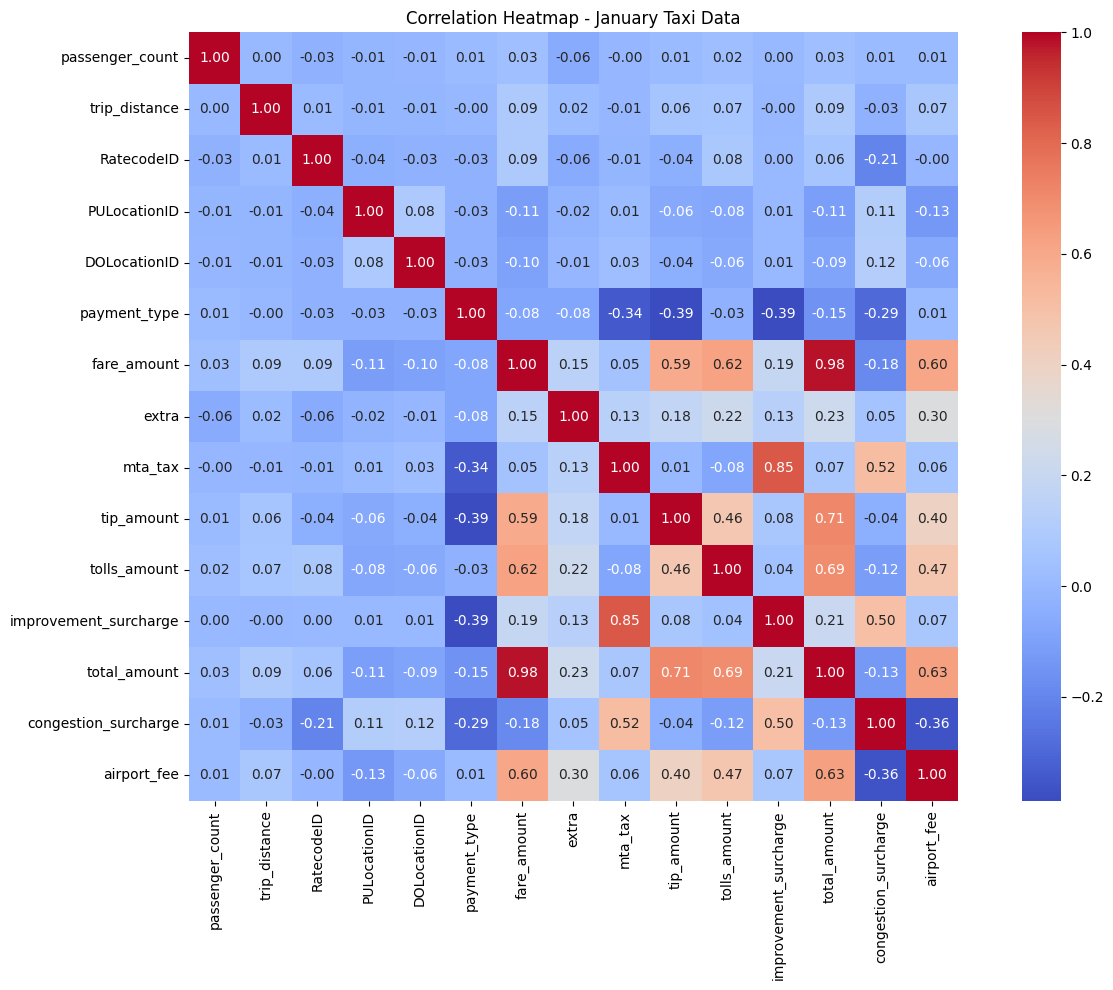

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap - January Taxi Data")
plt.tight_layout()
plt.show()

In [6]:

df1 = df1[df1['fare_amount'] > 2]
df1 = df1[df1['trip_distance'] > 0]
df_sample = df1.sample(n=300000, random_state=42)


In [8]:
df_sample = df_sample.drop(columns=["total_amount"])
df_sample = df_sample.drop(columns=["mta_tax"])


In [9]:
#time
df_sample['tpep_pickup_datetime'] = pd.to_datetime(df_sample['tpep_pickup_datetime'])
df_sample['pickup_hour'] = df_sample['tpep_pickup_datetime'].dt.hour
df_sample['pickup_weekday'] = df_sample['tpep_pickup_datetime'].dt.weekday  # Monday=0, Sunday=6
df_sample['is_peak_hour'] = (
    (df_sample['pickup_weekday'] < 5) &
    (df_sample['pickup_hour'] >= 16) &
    (df_sample['pickup_hour'] < 20)
).astype(int)
df_sample['is_night_hour'] = (
    (df_sample['pickup_hour'] >= 20) | (df_sample['pickup_hour'] < 6)
).astype(int)
df_sample

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,pickup_hour,pickup_weekday,is_peak_hour,is_night_hour
61056,2,2023-01-01 19:06:05,2023-01-01 19:16:47,1.0,2.70,1.0,N,263,143,1,...,0.0,1.82,0.0,1.0,2.5,0.0,19,6,0,0
2988847,2,2023-01-31 22:32:52,2023-01-31 22:43:08,1.0,1.78,1.0,N,236,163,1,...,1.0,3.42,0.0,1.0,2.5,0.0,22,1,0,1
276319,2,2023-01-04 16:30:20,2023-01-04 16:41:51,1.0,1.76,1.0,N,239,237,1,...,2.5,2.90,0.0,1.0,2.5,0.0,16,2,1,0
2644540,1,2023-01-28 10:44:09,2023-01-28 11:15:46,1.0,17.50,2.0,N,237,132,2,...,2.5,0.00,0.0,1.0,2.5,0.0,10,5,0,0
1895111,2,2023-01-20 22:09:59,2023-01-20 22:12:15,2.0,0.65,1.0,N,263,262,2,...,1.0,0.00,0.0,1.0,2.5,0.0,22,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1564886,1,2023-01-17 19:02:28,2023-01-17 19:11:27,0.0,1.30,1.0,N,43,170,1,...,5.0,2.37,0.0,1.0,2.5,0.0,19,1,1,0
1955409,2,2023-01-21 14:20:56,2023-01-21 14:28:37,1.0,1.07,1.0,N,162,186,2,...,0.0,0.00,0.0,1.0,2.5,0.0,14,5,0,0
1641046,2,2023-01-18 16:37:18,2023-01-18 16:39:50,2.0,0.53,1.0,N,140,237,1,...,2.5,2.32,0.0,1.0,2.5,0.0,16,2,1,0
569269,1,2023-01-07 16:33:30,2023-01-07 16:46:17,1.0,2.00,1.0,N,246,249,1,...,2.5,3.75,0.0,1.0,2.5,0.0,16,5,0,0


In [ ]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Load your cleaned sample (assuming you already saved it as sample_J.csv)
df = pd.read_csv('sample_J.csv')

# Define features and target
features = [
    'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
    'DOLocationID', 'payment_type', 'fare_amount', 'extra',
    'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee'
]
target = 'tip_amount'
categorical = ['payment_type', 'RatecodeID', 'PULocationID', 'DOLocationID']
numerical = list(set(features) - set(categorical))

# Create preprocessor
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical)
])
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('regression', LassoCV(cv=5, random_state=42))
])
# Separate X and y
X = df_model[features]
y = df_model[target]


pipeline.fit(X, y)

# Get feature names
cat_ohe = pipeline.named_steps['preprocessing'].named_transformers_['cat']
cat_feature_names = cat_ohe.get_feature_names_out(categorical)

feature_names = numerical + list(cat_feature_names)
coefficients = pipeline.named_steps['regression'].coef_

# Filter non-zero coefficients
coef_series = pd.Series(coefficients, index=feature_names)
selected = coef_series[coef_series != 0].sort_values()

In [13]:
df_sample.to_csv('sample_J.csv', index=False)

In [14]:
df_sample.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,pickup_hour,pickup_weekday,is_peak_hour,is_night_hour
61056,2,2023-01-01 19:06:05,2023-01-01 19:16:47,1.0,2.70,1.0,N,263,143,1,...,0.0,1.82,0.0,1.0,2.5,0.0,19,6,0,0
2988847,2,2023-01-31 22:32:52,2023-01-31 22:43:08,1.0,1.78,1.0,N,236,163,1,...,1.0,3.42,0.0,1.0,2.5,0.0,22,1,0,1
276319,2,2023-01-04 16:30:20,2023-01-04 16:41:51,1.0,1.76,1.0,N,239,237,1,...,2.5,2.90,0.0,1.0,2.5,0.0,16,2,1,0
2644540,1,2023-01-28 10:44:09,2023-01-28 11:15:46,1.0,17.50,2.0,N,237,132,2,...,2.5,0.00,0.0,1.0,2.5,0.0,10,5,0,0
1895111,2,2023-01-20 22:09:59,2023-01-20 22:12:15,2.0,0.65,1.0,N,263,262,2,...,1.0,0.00,0.0,1.0,2.5,0.0,22,4,0,1
